# Sinais Elementares e Operações Básicas

## Objetivos

<ul><li>Estudar os sinais elementares de tempo contínuo e discreto;</li>
<li>Realizar simulações computacionais de geração de sinais elementares;</li>
<li>Realizar operações básicas com sinais elementares.</li>

## Fundamentação Teórica

### Sinais Elementares

Os sinais elementares aparecem com maior frequência no estudo dos sistemas lineares, dentre os quais se destacam: o degrau unitário, o impulso unitário, a rampa, os sinais exponenciais e senoidais. Esses sinais são usados na construção de sinais mais complexos.
<ul><li><b>Impulso Unitário</b> (Delta de Dirac)</li></ul>

O sinal **Impulso Unitário** de tempo contínuo, $\delta(t)$ (delta minúsculo), também é conhecido como função **Delta de Dirac**, cujo análogo no domínio discreto é a função **Delta de Kronecker** (a qual vale 0 e 1), é definido pelas seguintes relações:

$$\delta(t)=0\;\;\;\textrm{para}\;\;t\neq0$$

$$\int_{-\infty}^{\infty}\delta(t)dt=1$$

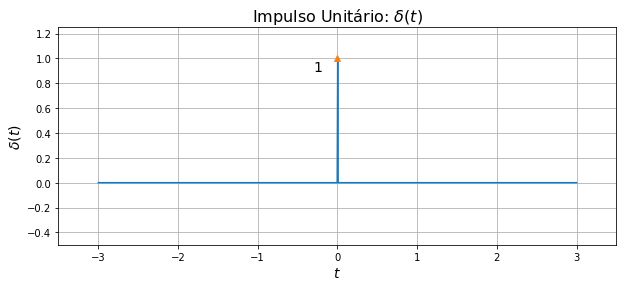

In [1]:
%matplotlib inline
from numpy import linspace, zeros, pi, cos, sin, exp
from pylab import plot, grid, xlabel, ylabel, title, figure, subplot, tight_layout, axis, legend, text

t = linspace(-3,3,1000)
dD = zeros(1000,dtype=float)     # delta de Dirac
dD[int(len(dD)/2)] = 1.          # impulso de área 1 na origem (t = 0)

figure(figsize=(10, 4))
plot(t,dD); plot(0.,1.,'^'); axis((-3.5,3.5,-0.5,1.25)); grid(True), text(-0.3, 0.9, "1",size=14)
xlabel('$t$',fontsize=14); ylabel('$\delta(t)$',fontsize=14); 
title(u'Impulso Unitário: $\delta(t)$',size=16);

<ul><li><b>Degrau Unitário</b> (Função de Heaviside)</li>

O sinal **Degrau Unitário** de tempo contínuo, comumente representado por $u(t)$, é definido por:


$$u(t)=\left\{\begin{matrix}
1,\;\;t\geq0\\ 
0,\;\;t<0
\end{matrix}\right.$$

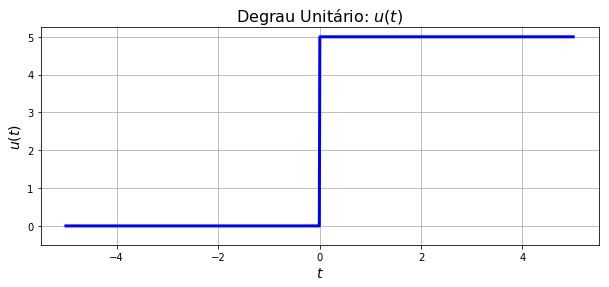

In [5]:
'''Degrau Unitário Contínuo (Heaviside)'''
t = linspace(-5,5,1000)
u = zeros(1000,dtype=float)      # degrau unitário: u(t)
u[t>=0] = 1.

figure(figsize=(10, 4))
plot(t,u,linewidth=3,color='b'); axis((-5.5,5.5,-0.5,1.25)); grid(True)
xlabel('$t$',fontsize=14); ylabel('$u(t)$',fontsize=14); title(u'Degrau Unitário: $u(t)$',size=16);

Este sinal pode representar o fechamento de uma chave/interruptor elétrico, colocada em série com uma carga e uma fonte de alimentação de valor  $v_s$, conforme Figura 1. Se o fechamento ocorre no instante $t=0$, então:

$$v_{out}(t)=\left\{\begin{matrix}
0,\;\;\;-\infty\lt t\lt0\\ 
v_s,\;\;\;0\leq t<\infty
\end{matrix}\right.$$

<img src="img/circuito1.png" height=100 width=250>

<img src="img/circuito1_vout.png" height=150 width=300>

**<ul><li>Rampa Unitária</li>**

O sinal **Rampa Unitária** de tempo contínuo é geralmente denotado por $r(t)$, é definido por:


$$r(t)=\left\{\begin{matrix}
t,\;\;t\geq0\\ 
0,\;\;t<0
\end{matrix}\right.$$

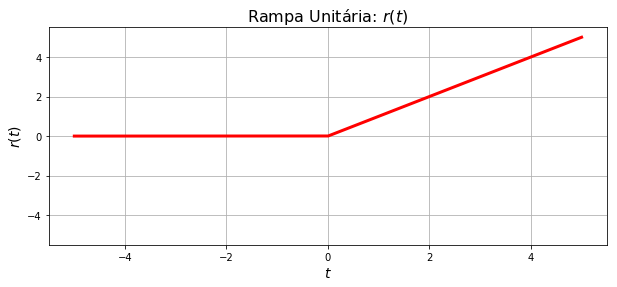

In [10]:
'''Rampa de coeficiente angular unitário'''
t = linspace(-5,5,1000)
r = zeros(1000,dtype=float)
r[t>=0] = t[500:]                         # reta afim (passa pela origem)

figure(figsize=(10, 4))
plot(t,r,'r',linewidth=3); axis((-5.5,5.5,-5.5,5.5)); grid(True)
xlabel('$t$',fontsize=14); ylabel('$r(t)$',fontsize=14); title(u'Rampa Unitária: $r(t)$',size=16);

**<ul><li>Triangular</li>**

O sinal **triangular** de tempo contínuo pode ser descrito por:


$$\Delta(t)=\left\{\begin{matrix}
t+2,\;\;-2< t < 0\\
-t+2,\;\;0\leq t \lt 2\\ 
0,\;\;\textrm{caso contrário}
\end{matrix}\right.$$

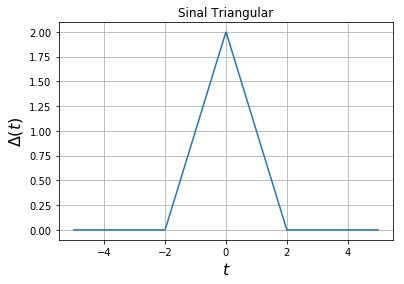

In [14]:
'''Sinal Triangular de base 4'''
t = linspace(-5,5,1000)
s = zeros(1000)                                # sinal triangular
s[(t>=-2)*(t<0)] = t[(t>=-2)*(t<0)] + 2        # subida: -1 < t < 0
s[(t>=0)*(t<2)] = -t[(t>=0)*(t<2)] + 2          # descida: 0 < t < 1

plot(t,s); grid(True)
xlabel('$t$',fontsize=16); ylabel('$\Delta(t)$',fontsize=16); title('Sinal Triangular');

**<ul><li>Senóide</li>**

O sinal **senoidal** de tempo contínuo de período $T=\frac{2\pi}{\omega}$ e fase $\theta$ pode ser descrito por:


$$x(t)=A.cos(\omega.t+\theta)$$

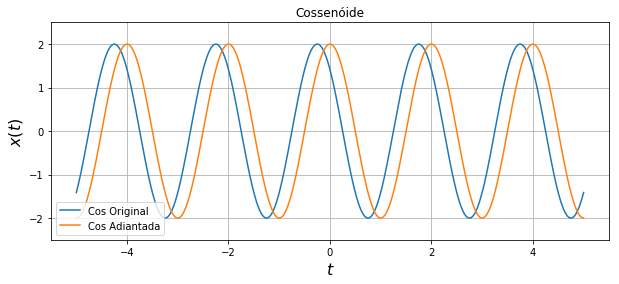

In [17]:
'''Senóide'''
t = linspace(-5,5,1000)
A = 2.; f = 0.5; omega = 2*pi*f; fase = pi/4
x = A*cos(omega*t + fase)                  # cossenóide 1
y = A*cos(omega*t)                         # cossenóide 2

figure(figsize=(10, 4))
plot(t,x,t,y); axis((-5.5,5.5,-2.5,2.5)); grid('on'); legend(('Cos Original','Cos Adiantada'))
xlabel('$t$',fontsize=16); ylabel('$x(t)$',fontsize=16); title(u'Cossenóide');

**<ul><li>Senóide Exponencialmente Amortecida</li>**

A multiplicação de uma senóide por um sinal exponencial decrescente resulta no sinal **Senoidal Exponencialmente Amortecido**, que é descrito pela equação:


$$x(t)=e^{-\alpha t}A.sen(\omega.t+\theta),\;\;\;\;\textrm{para}\;\;\;\alpha>0$$

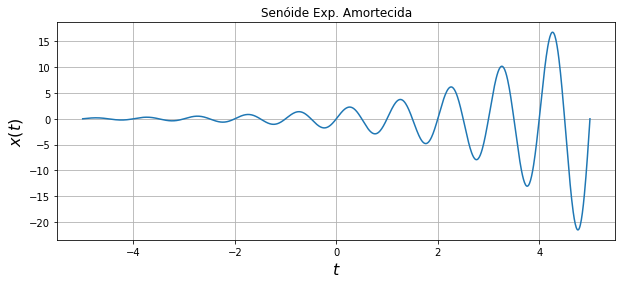

In [21]:
'''Senóide Exponencialmente Amortecida. '''
t = linspace(-5,5,1000)
A = 2.; f = 1; omega = 2*pi*f; fase = 0; alfa = -0.5
x = exp(-alfa*t)*A*sin(omega*t + fase)                  # cossenóide exponencialmente amortecida

figure(figsize=(10, 4))
plot(t,x); grid('on')
xlabel('$t$',fontsize=16); ylabel('$x(t)$',fontsize=16); title(u'Senóide Exp. Amortecida');

O gráfico anterior mostra a forma de onda do sinal exponencialmente amortecida com amplitude $\;A=2,\;f=1\,\textrm{Hz},\;\theta=\pi/4,\;\alpha=0,5$.  <p>Para o tempo crescente $t$, a amplitude da oscilação senoidal decresce de maneira exponencial, aproximando-se de zero no tempo infinito.

### Operações Básicas com Sinais

<h3 style="color:Tomato;">Variável Dependente:

<ul><li><b>Mudança da  Amplitude</b>:	$y(t)=c.x(t)$, onde $c$ é um valor escalar (fator de escala).</li>

<p>Os amplificadores eletrônicos realizam esse tipo de operação nos sinais. Um resistor também realiza essa operação, em que $x(t)$ é a corrente, $c$ é a resistência, e $y(t)$ é a tensão nos terminais do resistor.
<p>
<li><b>Adição</b>:	$y(t)=x_1(t)+x_2(t)$</li>

<p>Misturadores (*mixers*) realizam a soma de sinais, combinando sinais de instrumentos musicais e microfones (mixers de áudio).
<p>
<li><b>Multiplicação</b>: $y(t)=x_1(t).x_2(t)$</li>

<p>Sinais de rádio AM são obtidos a partir da multiplicação de um sinal de áudio (música, por exemplo) multiplicado por uma onda portadora (de alta frequência, ou seja, a frequência de sintonia da emissora de rádio).
<p>
<li><b>Diferenciação</b>:  $\frac{d}{dt}x(t)$</li>

A tensão nos terminais de um indutor é obtida através da diferenciação da corrente que o atravessa em relação ao tempo: $v_L(t)=L.\frac{d}{dt}i(t)$<p>

<li><b>Integração</b>: $\int_{-\infty}^t x(\tau)d\tau$</li>
<p>A tensão nos terminais de um capacitor é obtida através da integração da corrente que o atravessa em relação ao tempo: $v_C(t)=\frac{1}{C}\int_{-\infty}^t i(\tau)d\tau$

<h3 style="color:Tomato;">Variável Independente:

<ul><li><b>Deslocamento Temporal</b>:	$y(t)=x(t-t_0)$, se $t_0>0$ então $y(t)$ será uma versão atrasada no tempo do sinal original, $x(t)$, <br>e se $t_0<0$ então $y(t)$ será uma versão adiantada no tempo, de $x(t)$. 

Populating the interactive namespace from numpy and matplotlib


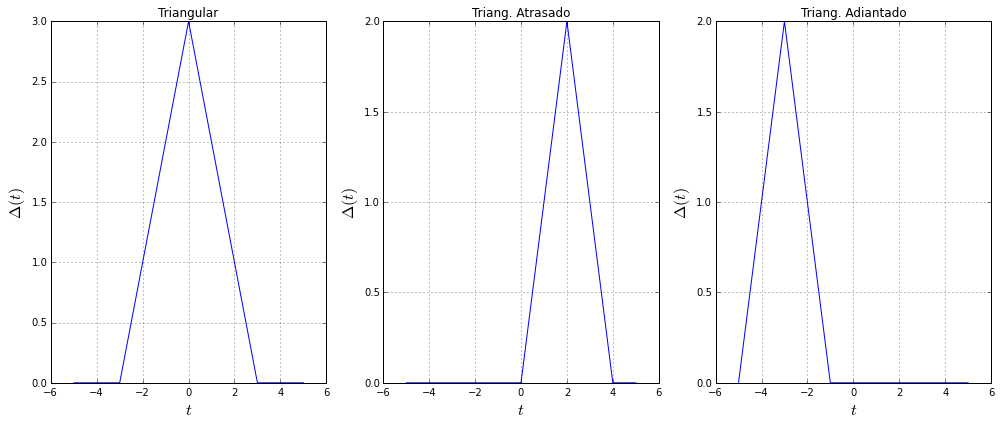

In [4]:
% pylab inline
'''Sinal Triangular - Atrasado e Adiantado no tempo'''
from numpy import linspace, zeros
from pylab import plot, grid, xlabel, ylabel, title, subplot, subplots, tight_layout 

def triang(t,base=2,t0=0):
  x = zeros(len(t))
  x[(t-t0>=-base/2)*(t-t0<0)] = t[(t>=-base/2)*(t<0)] + base/2        # subida: -base/2 < t < 0
  x[(t-t0>=0)*(t-t0< base/2)] = -(t[(t>=0)*(t<base/2)] - base/2)      # descida: 0 < t < base/2
  return x
  
t = linspace(-5,5,1000)
s = triang(t,6)                                                       # sinal triangular de base 6, centrado em 0 (zero)

subplots(figsize=(14,6))
subplot(131); plot(t,s); grid('on')
xlabel('$t$',fontsize=16); ylabel('$\Delta(t)$',fontsize=16); title('Triangular')

satrasado = triang(t,4,2)                                             # sinal triangular de base 4, atrasado de 2 unid. tempo
subplot(132); plot(t,satrasado); grid('on')
xlabel('$t$',fontsize=16); ylabel('$\Delta(t)$',fontsize=16); title('Triang. Atrasado')

sadiantado = triang(t,4,-3)                                           # sinal triangular de base 4, atrasado de 2 unid. tempo
subplot(133); plot(t,sadiantado); grid('on')
xlabel('$t$',fontsize=16); ylabel('$\Delta(t)$',fontsize=16); title('Triang. Adiantado')

tight_layout()

<ul><li><b>Mudança de Escala Temporal</b>:	$y(t)=x(a.t)$, se $a>1$ então $y(t)$ será uma versão comprimida no tempo, do sinal $x(t)$, <br>e se $0<a<1$ então $y(t)$ será uma versão expandida no tempo, de $x(t)$. 

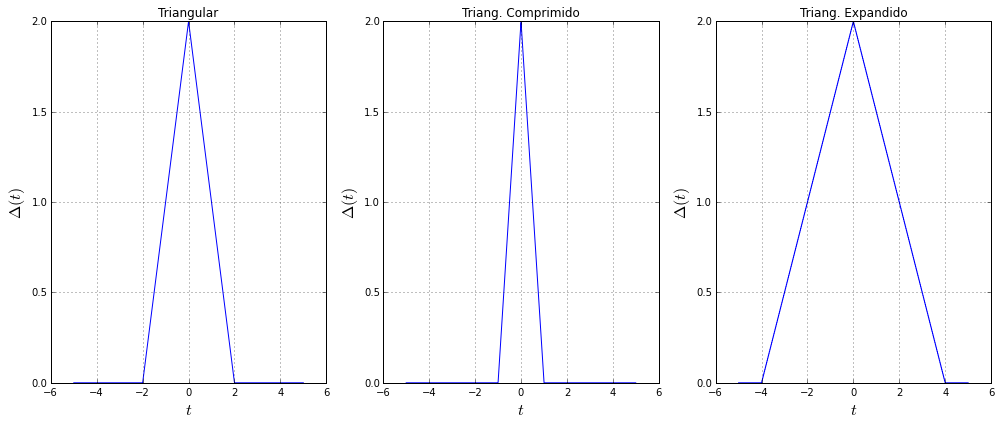

In [6]:
'''Sinal Triangular - Comprimido e Expandido no tempo'''
from numpy import linspace, zeros
from pylab import plot, grid, xlabel, ylabel, title, subplot, subplots, tight_layout, legend 

t = linspace(-5,5,1000)
s = zeros(1000)                                # sinal triangular
s[(t>=-2)*(t<0)] = t[(t>=-2)*(t<0)] + 2        # subida: -2 < t < 0
s[(t>=0)*(t<2)] = -(t[(t>=0)*(t<2)] - 2)       # descida: 0 < t < 2

subplots(figsize=(14,6))
subplot(131); plot(t,s); grid('on')
xlabel('$t$',fontsize=16); ylabel('$\Delta(t)$',fontsize=16); title('Triangular')

sc = zeros(1000)                               # sinal triangular comprimido - escala 2
sc[250:750] = s[::2]
subplot(132); plot(t,sc); grid('on')
xlabel('$t$',fontsize=16); ylabel('$\Delta(t)$',fontsize=16); title('Triang. Comprimido')

se = zeros(1000)                               # sinal triangular estendido - escala 1/2
se[0::2] = s[250:750]
se[1::2] = s[250:750]
subplot(133); plot(t,se); grid('on')
xlabel('$t$',fontsize=16); ylabel('$\Delta(t)$',fontsize=16); title('Triang. Expandido')
tight_layout()

### Exercícios

<ol>
<li>1. Trace o gráfico do sinal janela de base 3 e centrado em $t=3/2$: <p>$w(t)=u(t-3)-u(t)$:</li>

In [ ]:
'''Sinal Janela'''
t = linspace(-5,5,1000)
u = zeros(1000)
ua = zeros(1000)
u[t>=0] = 1.                                   # sinal degrau
ua[t>=3] = 1.                                  # sinal degrau atrasado de 3 unidades de tempo

plot(t,u-ua); grid('on'); axis((-5.5,5.5,-0.5,1.5))
xlabel('$t$',fontsize=16); ylabel('$w(t)$',fontsize=16); title('Sinal Janela')

<li>2. Trace o gráfico do oposto do sinal janela de base 3 e centrado em $t=3/2$: <p>$w(t)=-[u(t-3)-u(t)]=u(t)-u(t-3)$:</li>

In [ ]:
'''Oposto do Sinal Janela'''
t = linspace(-5,5,1000)
u = zeros(1000)
ua = zeros(1000)
u[t>=0] = 1.                                   # sinal degrau
ua[t>=3] = 1.                                  # sinal degrau atrasado

plot(t,ua-u); grid('on'); axis((-5.5,5.5,-1.5,1.5))
xlabel('$t$',fontsize=16); ylabel('$w(t)$',fontsize=16); title('Oposto do Sinal Janela')

<li>3. Trace o gráfico do sinal janela de base 3 e centrado em $t=3/2$ revertido temporalmente: <p>$w(-t)=u(-t-3)-u(-t)$:</li>

In [ ]:
'''Sinal Janela Revertido'''
t = linspace(-5,5,1000)
u = zeros(1000)
ua = zeros(1000)
u[t>=0] = 1.                                   # sinal degrau
ua[t>=3] = 1.                                  # sinal degrau atrasado

plot(t,u-ua,'-.',lw=2); grid('on'); axis((-5.5,5.5,-0.5,1.5))
xlabel('$t$',fontsize=16); ylabel('$w(t)$',fontsize=16); title('Sinal Janela Revertido')
plot(-t,u-ua,'r',lw=3)
legend(('Original','Revertido'))